In [1]:
#–Load and Plot Raw Price Data
import sys
import os

# 🛠 Add the 'src' directory to Python's module search path
sys.path.append(os.path.abspath("../src"))

from data_loader import load_and_clean_data, plot_price_trend

In [2]:

# Load the dataset
df = load_and_clean_data("../data/BrentOilPrices.csv")


In [3]:
# Display first 5 rows
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [4]:
# Check for missing values
df.isnull().sum()


Date     0
Price    0
dtype: int64

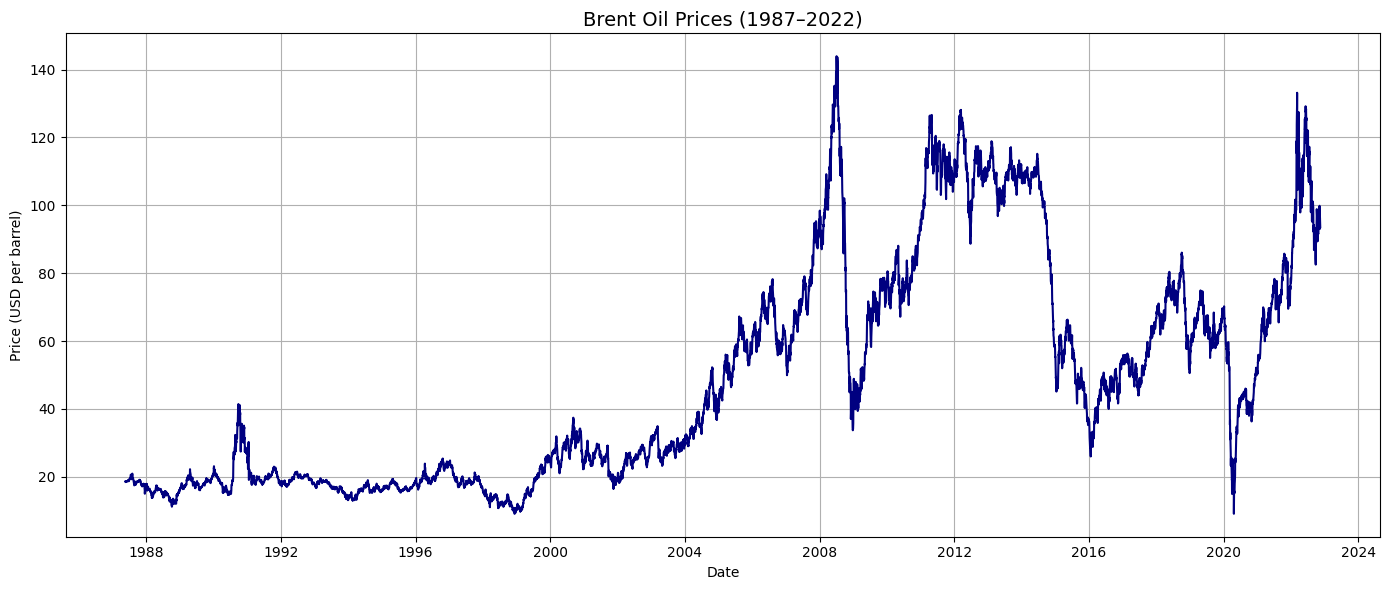

In [5]:
# Plot raw price trend
plot_price_trend(df)


Brent Oil Price Trend (1987–2022)

This time series plot visualizes historical Brent oil prices from 1987 to 2022:

Y-axis: Price of Brent crude oil in USD per barrel.

X-axis: Time, spanning from 1987 to 2022.

Key Observations:
📌 2008 Spike: Prices peaked above $140/barrel during the global financial crisis.

📉 2009 Crash: Sharp decline immediately followed, dropping to ~$40/barrel.

🔼 2011–2014 Plateau: Prices stabilized around $110–$120 before another drop.

⚠️ 2020 Dip: A major dip during the COVID-19 pandemic, briefly approaching $0.

🔁 Post-2020 Recovery: A strong rebound followed, with prices again exceeding $120/barrel in 2022.

Interpretation:
This plot provides a clear view of oil market volatility over 35 years, driven by macroeconomic events, geopolitical tensions, and supply-demand imbalances.

In [6]:
# 📥 Import preprocessing utilities
from preprocessing import compute_log_returns, plot_log_returns, test_stationarity


In [8]:
# 📊 Compute log returns from price series
df = compute_log_returns(df)

# Display with new column
df[['Date', 'Price', 'LogReturn']].head()


,Date,Price,LogReturn
2,1987-05-22,18.55,0.005405
3,1987-05-25,18.60,0.002692
4,1987-05-26,18.63,0.001612
5,1987-05-27,18.60,-0.001612
6,1987-05-28,18.60,0.000000
